In [13]:
from whakaari.utils import load_dataframe
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np
# import seaborn as sns
# sns.set_style("whitegrid")

In [14]:
# df = load_dataframe(r"D:\Project\whakaari\output\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl")

# df = load_dataframe(r"D:\Project\whakaari\output_train_1_and_2_DT\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl")

# df = load_dataframe(r"D:\Project\whakaari\output\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl")

df = load_dataframe(
    r"D:\Projects\whakaari-original\predictions\OJN_hires\consensus.pkl"
)

In [15]:
threshold = 0.7

In [16]:
df

,consensus
time,
2025-07-24 09:20:00,0.206
2025-07-24 09:30:00,0.200
2025-07-24 09:40:00,0.202
2025-07-24 09:50:00,0.190
2025-07-24 10:00:00,0.186
...,...
2025-08-21 23:10:00,0.184
2025-08-21 23:20:00,0.190
2025-08-21 23:30:00,0.204


In [5]:
df_more_than_threshold = df[df["consensus"] > threshold]

In [6]:
times = df_more_than_threshold.index

In [8]:
# times[0] + timedelta(days=1)

In [9]:
def compute_confidence_interval(values: np.ndarray):
    # 500 is number of classifiers
    confidence_interval = 1.96 * (np.sqrt(values * (1 - values) / 500))
    return confidence_interval

In [10]:
ci = compute_confidence_interval(df["consensus"])

In [11]:
new_df = df.resample("1h").mean()

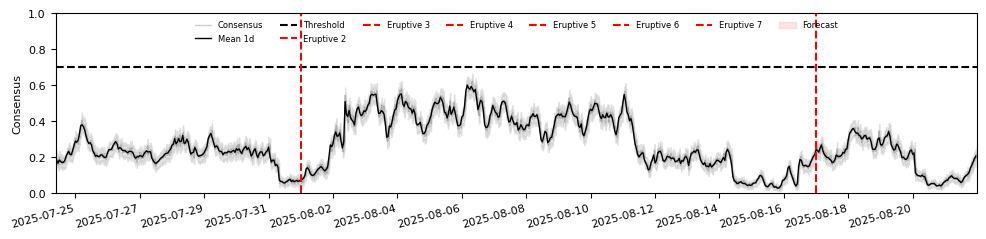

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2.5))

ax.plot(
    df.index, df["consensus"], color="black", linewidth=1, label="Consensus", alpha=0.2
)
ax.plot(new_df.index, new_df["consensus"], color="k", linewidth=1, label="Mean 1d")

ax.fill_between(
    df.index, (df["consensus"] - ci), (df["consensus"] + ci), color="gray", alpha=0.2
)
ax.fill_between(
    new_df.index,
    0,
    1.0,
    where=(new_df["consensus"] > threshold),
    color="red",
    alpha=0.1,
    label="Forecast",
    zorder=-3,
)

ax.set_ylim(0, 1.0)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(datetime.strptime("2025-07-31", "%Y-%m-%d"), datetime.strptime("2025-08-04", "%Y-%m-%d") )

ax.axhline(y=threshold, color="k", linestyle="--", linewidth=1.5, label="Threshold")
ax.set_ylabel("Consensus", fontsize=8)
ax.tick_params(labelsize=8)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# ax.axvline(datetime.strptime("2025-04-22", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 2")
# ax.axvline(datetime.strptime("2025-05-18", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 3")
# ax.axvline(datetime.strptime("2025-06-17", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 4")
# ax.axvline(datetime.strptime("2025-07-07", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 5")
ax.axvline(
    datetime.strptime("2025-08-01", "%Y-%m-%d"),
    color="red",
    linestyle="--",
    label="Eruptive 6",
)
ax.axvline(
    datetime.strptime("2025-08-17", "%Y-%m-%d"),
    color="red",
    linestyle="--",
    label="Eruptive 7",
)
# ax.grid(False)
ax.legend(loc="upper center", ncol=8, fontsize=6, frameon=False)
# ax.legend(loc='upper right', ncol=3, fontsize=8, frameon=False)

for label in ax.get_xticklabels(which="major"):
    label.set(rotation=15, horizontalalignment="right")

plt.tight_layout()
plt.savefig("agustus_OJN_DT_forecast_2025-08-01_2025-08-_new_.png", dpi=300)